In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [91]:
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

In [92]:
steel.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013


In [93]:
wood.tail()


,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
175,46,Megafobia,Oakwood,"Pembrookshire, Wales",Custom Coasters,1996,84,2018
176,47,Hades 360,Mount Olympus,"Wisconsin Dells, Wis.",Gravity Group,2005,80,2018
177,48,Mine Blower,Fun Spot,"Kissimmee, Fla.",Gravity Group,2017,79,2018
178,49,Wooden Warrior,Quassy Amusement Park,"Meddlebury, Conn.",Gravity Group,2011,77,2018
179,50,Twister,Knoebels Amusement Resort,"Elysburg, Pa.",Fetterman/Knoebels,1999,75,2018


In [94]:
def rank1(name,park, df):
    df_n = df[(df.Name == name) & (df.Park ==park)]
    rank = df_n.Rank
    year = df_n['Year of Rank']
    ax = plt.subplot(facecolor = 'cornflowerblue')
    plt.plot(year,rank, linewidth = 2, marker = 'o', color = 'r',label=name)
    ax.set_xticks(year)
    ax.set_xticklabels(year)
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title('Rank Time Series for {}'.format(name))
    ax.invert_yaxis()
    plt.legend()
    #return plt.show() 
    return [len(rank), len(year)]

[6, 6]

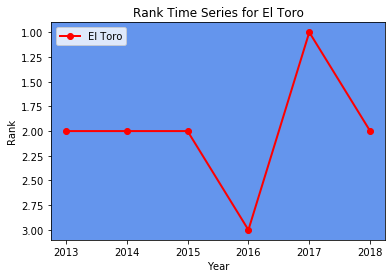

In [95]:
rank1('El Toro','Six Flags Great Adventure', wood)

In [96]:
def rank2(name1, name2,park1, park2, df):
    df_1 = df[(df.Name == name1) & (df.Park ==park1)]
    df_2 = df[(df.Name == name2) & (df.Park ==park2)]
    rank1 = df_1.Rank
    rank2 = df_2.Rank
    year1 = df_1['Year of Rank']
    year2 = df_2['Year of Rank']
    ax = plt.subplot(facecolor = 'cornflowerblue')
    plt.plot(year1,rank1, linewidth = 2, marker = 'o', color = 'r',label=name1)
    plt.plot(year2,rank2, linewidth = 2, marker = 'x', color = 'g',label=name2)
    ax.set_xticks(year1)
    ax.set_xticklabels(year1)
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title('Rank Time Series for {} and {}'.format(name1,name2))
    ax.invert_yaxis()
    plt.legend()
    return plt.show() 
    

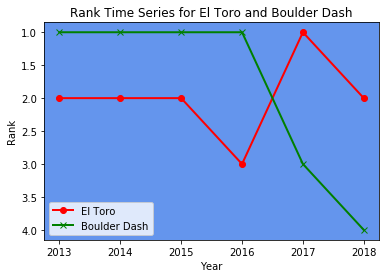

In [97]:
rank2('El Toro','Boulder Dash','Six Flags Great Adventure','Lake Compounce', wood)

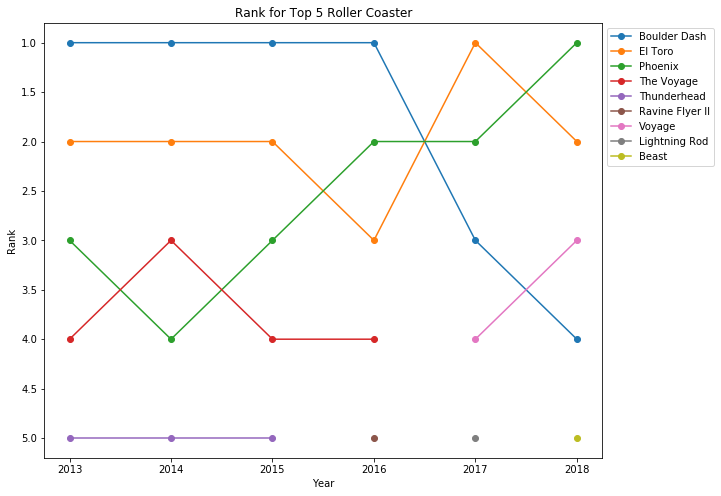

In [98]:
wood_n = wood[wood.Rank <= 5]
names = wood_n.Name.unique()
plt.figure(figsize = (10,8))
ax1=plt.subplot()
ax1.set_xticks([i+2013 for i in range(6)])
ax1.set_xticklabels([i+2013 for i in range(6)])
ax1.invert_yaxis()
for i in names:
    year = wood_n[wood_n['Name'] == i]['Year of Rank']
    year = year.tolist()
    rank = wood_n[wood_n['Name'] == i]['Rank']
    rank = rank.tolist()
    plt.plot(year,rank, label=i, marker = 'o')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylabel('Rank')
plt.xlabel('Year')
plt.title('Rank for Top {} Roller Coaster'.format(5))
plt.show()

In [99]:
def top_n(n, df):
    df_n = df[df.Rank <= n]
    names = df_n.Name.unique()
    plt.figure(figsize = (10,8))
    ax1=plt.subplot()
    ax1.set_xticks([i+2013 for i in range(6)])
    ax1.set_xticklabels([i+2013 for i in range(6)])
    ax1.invert_yaxis()
    for i in names:
        year = df_n[df_n['Name'] == i]['Year of Rank']
        year = year.tolist()
        rank = df_n[df_n['Name'] == i]['Rank']
        rank = rank.tolist()
        plt.plot(year,rank, label=i, marker = 'o')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.ylabel('Rank')
    plt.xlabel('Year')
    plt.title('Rank for Top {} Roller Coaster'.format(n))
    
    return plt.show()

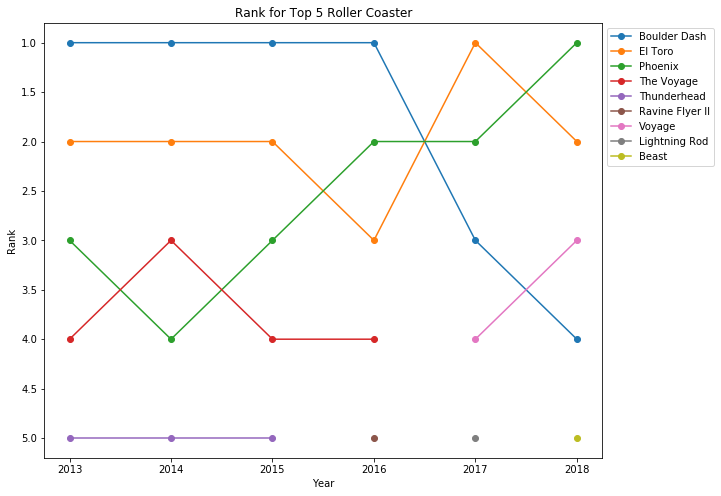

In [100]:
top_n(5, wood)

In [310]:
rc = pd.read_csv('roller_coasters.csv')
rc.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


In [102]:
def rc_hist(param, df):
    if df[param].dtype != object:
        if param != 'num_inversions':
            if abs(df[param].skew(axis=0, skipna=True)) >= 1:
                sns.histplot(data=df, x=param, log_scale=True)
            else:
                sns.histplot(data=df, x=param)
        else:
            print('Use next function for distribution of number of inversions')
        plt.title('{} Distribution'.format(param.title()))
    else:
        print('Parameter must be numeric')
    return plt.show()

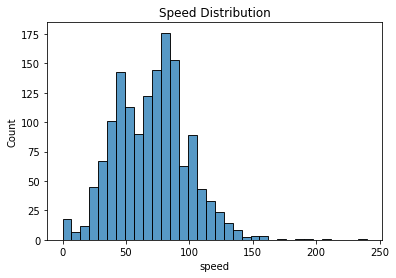

In [103]:
rc_hist('speed',rc)

In [189]:
def n_inv(park, df):
    df_p = df[df.park == park]
    df_p = df_p.sort_values(by = 'num_inversions')
    if df_p.num_inversions.max() == 0:
        print('No roller coasters do inversions in {}.'.format(park))
    else:
        plt.figure(figsize = (10,8))
        sns.barplot(data = df_p, y='name', x = 'num_inversions')
        plt.title('Number of Inversions for {}'.format(park))
    return plt.show()

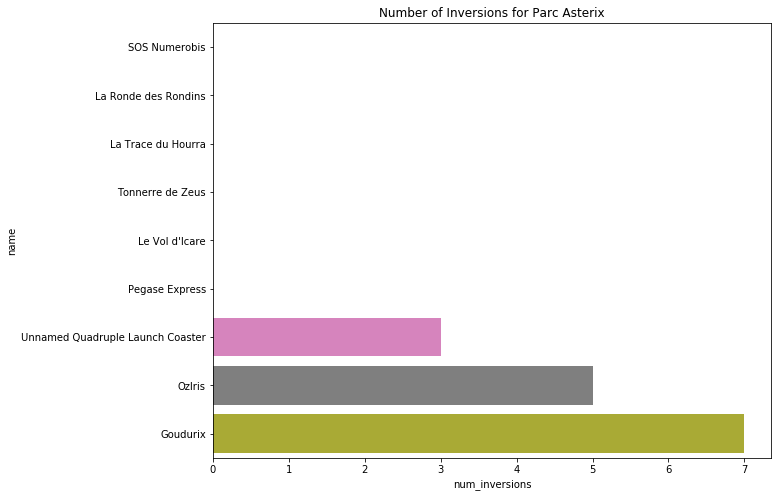

In [241]:
n_inv('Parc Asterix', rc)

In [239]:
def status(df):
    df_g = df.groupby('status').park.count().reset_index()
    df_g = df_g.iloc[[1,4]]
    df_g.set_index('status',inplace=True)
    ax = plt.subplot()
    df_g.plot.pie(y='park',autopct = '%1.1f%%',ax = ax,labels = ['',''], shadow =True,startangle =0,title = 'Status')
    ax.legend(labels = df_g.index, loc=4)
    return plt.show()

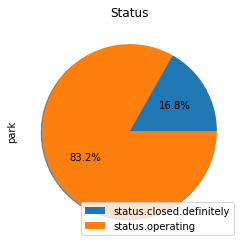

In [240]:
status(rc)

In [308]:
from sklearn.metrics import r2_score
def scat(df, col1, col2):
    df = df.dropna()
    if df[col1].dtype == object or df[col2].dtype == object:
        print('Columns must be numeric.')
    else:
        x = df[col1].tolist()
        y = df[col2].tolist()
        z = np.polyfit(x, y, 1)
        predict = np.poly1d(z)
        ax = plt.subplot(facecolor = 'cornflowerblue')
        ax.annotate("r-squared = {:.3f}".format(r2_score(y, predict(y))), (0.7*max(x), 0))
        plt.scatter(x, y, color = 'g', label = 'data')
        plt.plot(x,predict(x), label = 'linear trendline', color='r')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.legend()
        plt.title('{} vs {}'.format(col2.title(), col1.title()))
    return plt.show()

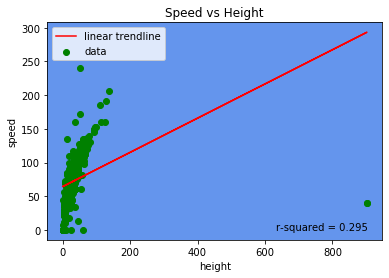

In [311]:
scat(rc, 'height', 'speed')

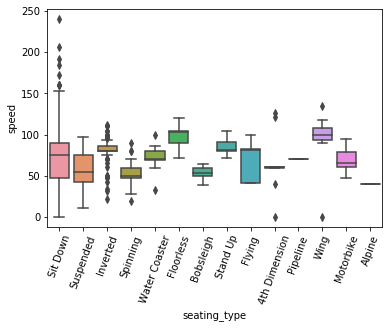

In [332]:
rc.head()
rc2 = rc.dropna()
rc1 = rc.groupby('seating_type').count().reset_index()
rc1.rename(columns = {'name':'Count'}, inplace=True)
ax = plt.subplot()
#ax.set_xticks(range(len(rc1.Count)))
#ax.set_xticklabels(rc1.Count, rotation = 70)
#sns.barplot(data=rc1, x = 'seating_type', y = 'Count')
ax.set_xticks(range(len(rc1.Count)))
ax.set_xticklabels(rc1.Count, rotation = 70)
sns.boxplot(data = rc2, x = 'seating_type', y = 'speed')


In [386]:
def seat(df):
    df1= df.dropna()
    df_g = df1.groupby('seating_type').name.count().reset_index()
    df_g.rename(columns = {'name':'Count'}, inplace=True)
    fig, ax= plt.subplots(2,2, figsize = (10,10))
    
    #ax.set_xticks(range(len(dfg.seating_type)))
    #ax.set_xticklabels(dfg.seating_type, rotation = 70)
    #plt.xticks(rotation=70)
    sns.barplot(data= df_g, x = 'seating_type', y = 'Count', ax =ax[0,0]).set_title('Seating Type Distribution')
    sns.boxplot(data = df1, x = 'seating_type', y = 'speed', ax=ax[0,1]).set_title('Speed by Seating Type')
    sns.boxplot(data = df1, x = 'seating_type', y = 'height', ax=ax[1,0]).set_title('Height by Seating Type')
    sns.boxplot(data = df1, x = 'seating_type', y = 'length', ax=ax[1,1]).set_title('Length by Seating Type')
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=70)
    fig.subplots_adjust(hspace = 0.8)   
    return plt.show()

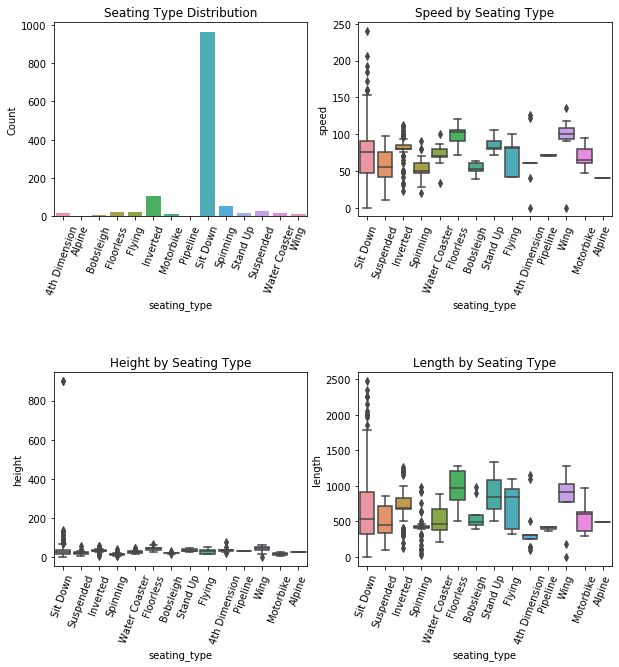

In [387]:
seat(rc)

In [388]:
rc.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


In [403]:
rcg = rc.dropna(inplace = True)
rcg = rc.groupby('park').mean().reset_index()
rcg.sort_values(by = 'speed' ,ascending = False, inplace= True)
rcg.iloc[:5, :2]

,park,speed
107,Ferrari Land,185.0
252,Nürburgring,160.0
108,Ferrari World,154.0
336,Sun Tzu Cultural Park,135.0
355,Tokyo Dome City,130.0


In [422]:
def top_5(param, df):
    rcg = df.dropna()
    rcg = rcg.groupby('park')[param].mean().reset_index()
    rcg.sort_values(by = param ,ascending = False, inplace= True)
    rcg = rcg.iloc[:5, :2]
    sns.barplot(data= rcg, x = 'park', y = param).set_title('Top 5 Parks for {}'.format(param))
    plt.xticks(rotation=45)
    return plt.show()

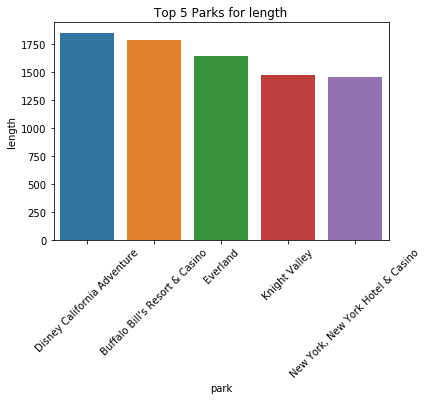

In [424]:
top_5('length',rc)